In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# from statannotations.Annotator import Annotator

import json

In [2]:
cartography_df = pd.read_csv('./results/full_cartography.csv')
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
0,0,27,people be shooting their guns around here late...,0.468335,0.254122,0.461694,0.531665,0.254122,0.538306,0,...,0.468335,0.254122,0.461694,False,0,1.000000,1.0,False,0.634558,0.371043
1,18,27,people be shooting their guns around here late...,0.673583,0.149176,0.843622,0.326417,0.149176,0.156378,0,...,0.673583,0.149176,0.843622,True,0,1.000000,1.0,False,0.634558,0.371043
2,19,27,people be shooting their guns around here late...,0.598873,0.250696,0.965319,0.401127,0.250696,0.034681,0,...,0.598873,0.250696,0.965319,True,0,1.000000,1.0,False,0.634558,0.371043
3,0,245,S/o to dat bitch ass nigga in Alabama who wann...,0.432531,0.089234,0.475542,0.567469,0.089234,0.524458,0,...,0.432531,0.089234,0.475542,False,1,0.666667,0.8,True,0.854028,0.090836
4,44,245,S/o to dat bitch ass nigga in Alabama who wann...,0.472632,0.200629,0.205699,0.527368,0.200629,0.794301,1,...,0.527368,0.200629,0.794301,True,1,0.666667,0.8,False,0.854028,0.090836


In [3]:
both_votes_df = cartography_df[cartography_df['agreement_factor'] < 1.0].copy()
both_votes_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
3,0,245,S/o to dat bitch ass nigga in Alabama who wann...,0.432531,0.089234,0.475542,0.567469,0.089234,0.524458,0,...,0.432531,0.089234,0.475542,False,1,0.666667,0.8,True,0.854028,0.090836
4,44,245,S/o to dat bitch ass nigga in Alabama who wann...,0.472632,0.200629,0.205699,0.527368,0.200629,0.794301,1,...,0.527368,0.200629,0.794301,True,1,0.666667,0.8,False,0.854028,0.090836
5,57,245,S/o to dat bitch ass nigga in Alabama who wann...,0.368366,0.151878,0.343379,0.631634,0.151878,0.656621,1,...,0.631634,0.151878,0.656621,True,1,0.666667,0.8,False,0.854028,0.090836
6,0,404,RT @NerdAtCoolTable: Any chick that gets In a ...,0.324292,0.095758,0.418641,0.675708,0.095758,0.581359,1,...,0.675708,0.095758,0.581359,True,1,0.666667,0.8,False,0.826462,0.217120
7,39,404,RT @NerdAtCoolTable: Any chick that gets In a ...,0.594642,0.098114,0.547529,0.405358,0.098114,0.452471,0,...,0.594642,0.098114,0.547529,True,1,0.666667,0.8,True,0.826462,0.217120


In [4]:
cartography_df['Mindex'].nunique()

27231

In [5]:
both_votes_df[both_votes_df['Mindex'] == 679][['confidence', 'text', 'Aindex', 'pred', 'label']].values

array([[0.7451552867889404,
        'At the MLK march tryna find a man bitch we see U', 9, 1, 1],
       [0.6453444361686707,
        'At the MLK march tryna find a man bitch we see U', 55, 0, 0],
       [0.4927133440971374,
        'At the MLK march tryna find a man bitch we see U', 58, 1, 0]],
      dtype=object)

In [6]:
both_votes_df[both_votes_df['Aindex'] == 0][['confidence', 'text', 'pred', 'label']].values

array([[0.4325306832790375,
        'S/o to dat bitch ass nigga in Alabama who wanna kill me #GoodLucc',
        1, 0],
       [0.6757081985473633,
        'RT @NerdAtCoolTable: Any chick that gets In a fight after the age 24 is a hoe',
        1, 1],
       [0.5815780520439148,
        'RT @iDntWearCondoms: If your girl see that another girl likes you, her name is "this bitch" until further notice.',
        0, 0],
       [0.4629585146903991,
        '"@PRAYINGFORHEAD: &#8220;@macklemroe: Stop bringing weird niggers into my mentions! @PRAYINGFORHEAD&#8221; http://t.co/cussDJesRK"',
        0, 1],
       [0.8293987274169922,
        'Dumb bitches that think Buddha says namaste', 1, 1],
       [0.3276289016008377,
        'Yandy gotta pay me for dick im sorry...that bitch ugly', 1, 0],
       [0.3012238472700118, 'Wut a bitch', 1, 0],
       [0.6378005027770997,
        '"I used to dress up like a cop too."\n"Oh really?"\n"Yeah...right after 9/11...mad pussy."\n"Really?"\n"Yes...I\'ll N

In [12]:
grouped_data_label = both_votes_df.groupby(['Mindex', 'label']).agg({'confidence': 'mean'}).reset_index()
grouped_data_label = grouped_data_label.pivot(index='Mindex', columns='label', values='confidence').reset_index()
grouped_data_label.rename(columns={0: 'label_0', 1: 'label_1', 'label': 'index'}, inplace=True)
grouped_data_label.head()

label,Mindex,label_0,label_1
0,7,0.345700,0.836047
1,8,0.238775,0.760268
2,16,0.516981,0.595758
3,18,0.809001,0.360159
4,30,0.299280,0.531855


In [13]:
count_column = both_votes_df.groupby('Mindex').size().reset_index(name='count')
grouped_data_label = grouped_data_label.merge(count_column, on='Mindex')

In [14]:
grouped_data_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486 entries, 0 to 6485
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mindex   6486 non-null   int64  
 1   label_0  6486 non-null   float64
 2   label_1  6486 non-null   float64
 3   count    6486 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 253.4 KB


In [15]:
both_greater = len(grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] > 0.5)])
only_0_greater = len(grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] <= 0.5)])
only_1_greater = len(grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] > 0.5)])
none_greater = len(grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] <= 0.5)])
both_greater, only_0_greater, only_1_greater, none_greater

(2177, 2243, 1790, 276)

<Axes: >

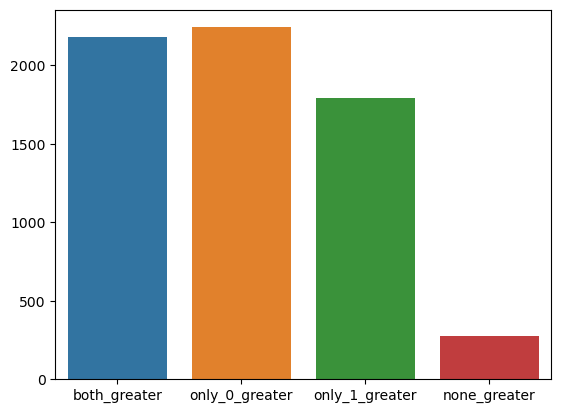

In [16]:
sns.barplot(x=['both_greater', 'only_0_greater', 'only_1_greater', 'none_greater'], y=[both_greater, only_0_greater, only_1_greater, none_greater])